In [1]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
from tensorflow.keras import layers
from IPython.display import Image, display
import shutil

In [2]:
# declaring directories
data_dir = os.curdir
data_dir = pathlib.Path(data_dir)
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
print(os.listdir(train_dir))


['Boots', 'Sandals', 'Slippers']


In [3]:
# getting image count of every type and viewing image of each type
#
for type in ['Boots', 'Sandals', 'Slippers']:
    img = list(data_dir.glob('train/'+type+'/*.jpg'))
    count = len(img)
    print(type, 'count:', count)
    # PIL.Image.open(str(img[0])).show()



Boots count: 326
Sandals count: 306
Slippers count: 146


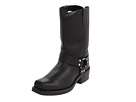

In [4]:
# viewing image of each type
# viewing boot
boots = list(data_dir.glob('train/boots/*.jpg'))
PIL.Image.open(str(boots[0]))


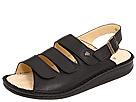

In [5]:
# viewing sandal
sandals = list(data_dir.glob('train/Sandals/*.jpg'))
PIL.Image.open(str(sandals[0]))

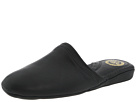

In [6]:
# viewing slipper
slippers = list(data_dir.glob('train/slippers/*.jpg'))
PIL.Image.open(str(slippers[0]))


In [7]:
# Define some parameters for the loader:
batch_size = 32
img_height = 102  # from image
img_width = 136  # from image

In [8]:
# train dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 778 files belonging to 3 classes.
Using 623 files for training.


In [9]:
# validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 778 files belonging to 3 classes.
Using 155 files for validation.


In [10]:
# printing the class names
class_names = train_ds.class_names
print(class_names)


['Boots', 'Sandals', 'Slippers']


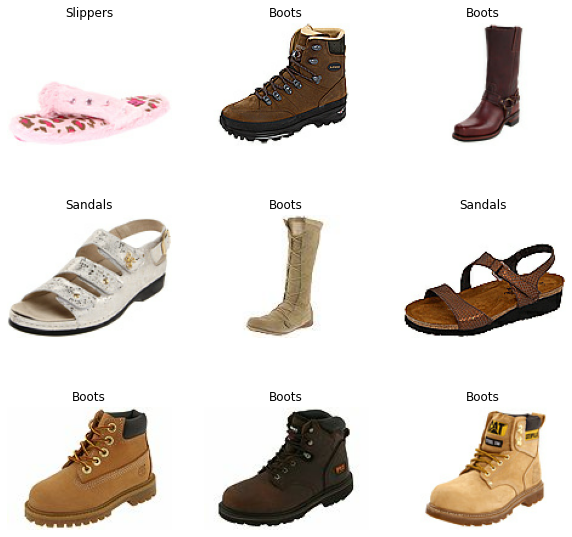

In [11]:
# visualizing the data

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [12]:
# printing image shape and batch shape
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break



(32, 102, 136, 3)
(32,)


In [13]:
# standardizing the data
# since RGB channel values are in the range [0,255]
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255,
                                                                  input_shape=(img_height, img_width, 3))


In [14]:
# creating the model
num_classes = 3  # for 3 types of footwear
model = tf.keras.models.Sequential([
    normalization_layer,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])



In [15]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])

In [16]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 102, 136, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 102, 136, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 51, 68, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 51, 68, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 34, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 17, 64)        0

In [17]:
# training the model
epochs = 15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/15
20/20 [==============================] - 6s 291ms/step - loss: 0.9456 - accuracy: 0.6116 - val_loss: 0.3296 - val_accuracy: 0.9097
Epoch 2/15
20/20 [==============================] - 5s 227ms/step - loss: 0.3428 - accuracy: 0.8507 - val_loss: 0.2871 - val_accuracy: 0.9419
Epoch 3/15
20/20 [==============================] - 4s 222ms/step - loss: 0.2119 - accuracy: 0.8989 - val_loss: 0.2158 - val_accuracy: 0.9226
Epoch 4/15
20/20 [==============================] - 5s 239ms/step - loss: 0.2000 - accuracy: 0.9181 - val_loss: 0.2739 - val_accuracy: 0.9290
Epoch 5/15
20/20 [==============================] - 5s 248ms/step - loss: 0.1342 - accuracy: 0.9599 - val_loss: 0.2218 - val_accuracy: 0.9032
Epoch 6/15
20/20 [==============================] - 4s 222ms/step - loss: 0.0866 - accuracy: 0.9695 - val_loss: 0.2992 - val_accuracy: 0.9226
Epoch 7/15
20/20 [==============================] - 4s 220ms/step - loss: 0.0832 - accuracy: 0.9743 - val_loss: 0.2749 - val_accuracy: 0.9097
Epoch 

 we get 98.72% training accuracy and 96.13 % validation accuracy

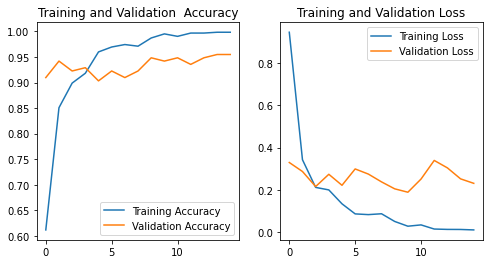

In [18]:
# visulaizing the training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation  Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

 we see that training and validation accuracy and loss are very close
 which shows that the model is not overfitting

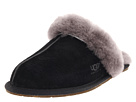

This image most likely belongs to Slippers with a 99.98 percent confidence.


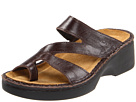

This image most likely belongs to Sandals with a 100.00 percent confidence.


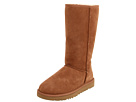

This image most likely belongs to Boots with a 100.00 percent confidence.


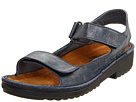

This image most likely belongs to Sandals with a 100.00 percent confidence.


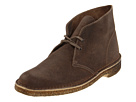

This image most likely belongs to Boots with a 100.00 percent confidence.


In [19]:
# predicting on random 5 test data
for i in np.random.randint(1, 10, 5):
    image_list = list(data_dir.glob('test/*.jpg'))
    # i=6 # randomly selecting

    img = tf.keras.preprocessing.image.load_img(
        image_list[i], target_size=(img_height, img_width)
    )

    # creating an array
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    # predicting
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    display(Image(filename=image_list[i]))
    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )

In [20]:

# creating new folder to segragate the images
parent_dir = test_dir

boots_dir = 'Boots'
sandals_dir = 'Sandals'
slippers_dir = 'Slippers'

for type in ['Boots', 'Sandals', 'Slippers']:
    path = os.path.join(parent_dir, type)
    os.mkdir(path)


In [21]:

parent_dir = test_dir
image_list = list(data_dir.glob('test/*.jpg'))
for i in range(len(image_list)):
    img = tf.keras.preprocessing.image.load_img(
        image_list[i], target_size=(img_height, img_width))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    for type in ['Boots', 'Sandals', 'Slippers']:
        if class_names[np.argmax(score)] == type:
            path = os.path.join(parent_dir, type)
            shutil.copy(image_list[i], path)



 Check the folder and confirm